In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import os

In [3]:
%matplotlib inline

In [ ]:
""" SHOCKTUBES """

In [ ]:
fs_IS = []
fs_ISCE = []
fs_BDNK = []
for n in range(6):
    fs_IS.append(h5py.File(f'IS/PureShear/Shear/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ISCE.append(h5py.File(f'ISCE/PureShear/Shear/data_serial_TIx_{n}.hdf5', 'r'))
    fs_BDNK.append(h5py.File(f'ISCE/PureShear/Shear/data_serial_TIx_{n}.hdf5', 'r'))    

In [3]:
""" KH """

' KH '

In [7]:
fs_IS = []
fs_ISCE = []
fs_BDNK = []
for n in range(11):
#     fs_IS.append(h5py.File(f'IS/KH/Ideal/dp_800x800x0_{n}.hdf5', 'r'))
    fs_IS.append(h5py.File(f'IS/KH/Ideal/cfl04/dp_400x400x0_{n}.hdf5', 'r'))
#     fs_ISCE.append(h5py.File(f'ISCE/KH/Ideal/dp_800x800x0_{n}.hdf5', 'r'))
    fs_ISCE.append(h5py.File(f'ISCE/KH/Ideal/cfl04/dp_400x400x0_{n}.hdf5', 'r'))
#     fs_BDNK.append(h5py.File(f'BDNK/KH/Ideal/dp_800x800x0_{n}.hdf5', 'r'))
    fs_BDNK.append(h5py.File(f'BDNK/KH/Ideal/dp_400x400x0_{n}.hdf5', 'r'))
fss = [fs_IS, fs_ISCE, fs_BDNK]
names = ['IS Ideal','ISCE Ideal','BDNK Ideal']

In [36]:
fs_IS = []
fs_ISCE = []
fs_BDNK = []
for n in range(11):
#     fs_IS.append(h5py.File(f'IS/KH/Shear/tau5em1eta5em3/dp_200x200x0_{n}.hdf5', 'r'))
#     fs_IS.append(h5py.File(f'IS/KH/Shear/tau1em2eta1em3/dp_200x200x0_{n}.hdf5', 'r'))
    fs_IS.append(h5py.File(f'IS/KH/Shear/cfl04/dp_200x200x0_{n}.hdf5', 'r'))
#     fs_IS.append(h5py.File(f'IS/KH/Shear/TI/dp_800x800x0_{n}.hdf5', 'r'))
for n in range(11):
#     fs_ISCE.append(h5py.File(f'ISCE/KH/Shear/tau5em2eta5em3/dp_200x200x0_{n}.hdf5', 'r'))
#     fs_ISCE.append(h5py.File(f'ISCE/KH/Shear/tau5em3eta1em3wide/dp_200x200x0_{n}.hdf5', 'r'))
    fs_ISCE.append(h5py.File(f'ISCE/KH/Shear/cfl04/dp_200x200x0_{n}.hdf5', 'r'))
for n in range(11):
#     fs_BDNK.append(h5py.File(f'BDNK/KH/800x800/dp_800x800x0_{n}.hdf5', 'r'))
#     fs_BDNK.append(h5py.File(f'BDNK/KH/eta0_5em4/dp_200x200x0_{n}.hdf5', 'r'))
#     fs_BDNK.append(h5py.File(f'BDNK/KH/Shear/dp_200x200x0_{n}.hdf5', 'r'))
    fs_BDNK.append(h5py.File(f'BDNK/KH/eta1em4/dp_800x800x0_{n}.hdf5', 'r'))

fss = [fs_IS, fs_ISCE, fs_BDNK]
names = ['IS Shear','ISCE Shear','BDNK Shear']

In [38]:
for fs in fss:
    print(f"endtime: {fs[-1].attrs['t']}")
    zeta = fs[0]['Optional'].attrs['zeta'][0]
    kappa = fs[0]['Optional'].attrs['kappa'][0]
    if fs == fs_BDNK:
        eta = fs[0]['Optional'].attrs['eta_0'][0]
    else:
        eta = fs[0]['Optional'].attrs['eta'][0]

    if fs != fs_BDNK:
        tau_Pi = fs[0]['Optional'].attrs['tau_Pi'][0]
        tau_q = fs[0]['Optional'].attrs['tau_q'][0]
        tau_pi = fs[0]['Optional'].attrs['tau_pi'][0]

    print(f"Dissipation strengths: zeta {zeta}, "
          f"kappa: {kappa}, ", f"eta: {eta}, "
      f"relaxation time {tau_pi}, "
      f"timestep {fs[0]['Domain'].attrs['dt'][0]}")

endtime: [30.]
Dissipation strengths: zeta 1e-15, kappa: 1e-15,  eta: 0.005, relaxation time 0.5, timestep 0.001414213562373095
endtime: [30.]
Dissipation strengths: zeta 1e-15, kappa: 1e-15,  eta: 0.005, relaxation time 0.5, timestep 0.001414213562373095
endtime: [30.]
Dissipation strengths: zeta 1e-15, kappa: 1e-15,  eta: 0.0001, relaxation time 0.5, timestep 0.00035355339059327376


In [39]:
print(fs_IS[-1].attrs['t'])
print(fs_ISCE[-1].attrs['t'])
print(fs_BDNK[-1].attrs['t'])

[30.]
[30.]
[30.]


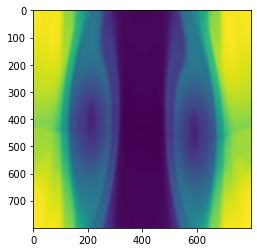

In [40]:
plt.imshow(fs_BDNK[-1]['Conserved/D'])

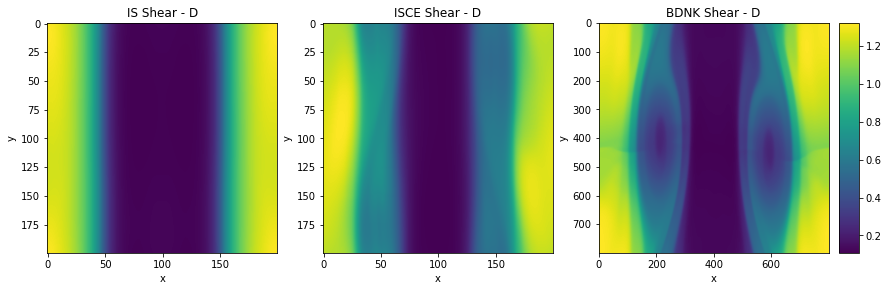

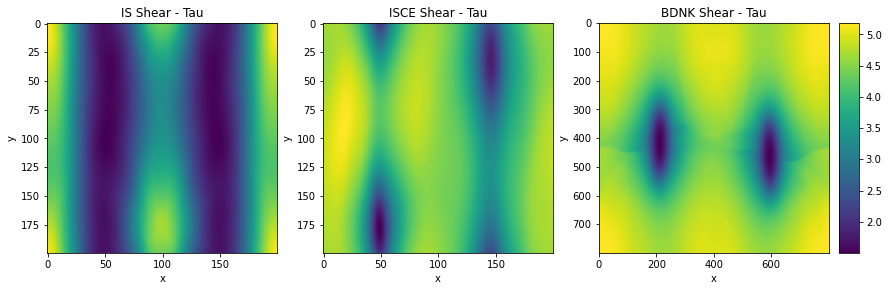

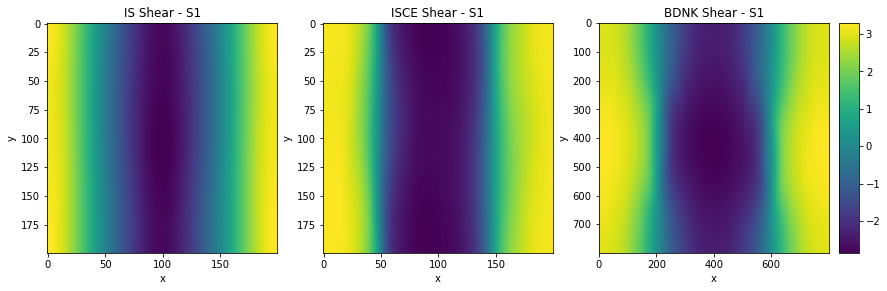

In [41]:
for quant in['D','Tau','S1']:
    fig, axes = plt.subplots(1,3,figsize=(14, 10))
    for fs, name, sp in zip(fss, names, axes):
        im = sp.imshow(fs[-1]['Conserved/'+quant],label=name)
        sp.set_title(name+' - '+quant)
        sp.set_xlabel('x')
        sp.set_ylabel('y')
#     cbar_ax = fig.add_axes([0.95, 0.1, 0.02, 0.8])
    cax = fig.add_axes([axes[2].get_position().x1+0.01,axes[2].get_position().y0,0.02,axes[2].get_position().height])
#     fig.colorbar(im,fraction=0.1, pad=0.14)#cax=cbar_ax)
    fig.colorbar(im,cax=cax)
    plt.show()
#     plt.savefig("ConfirmationReportPlots/KH/ConsIDCompare_"+quant+".pdf")

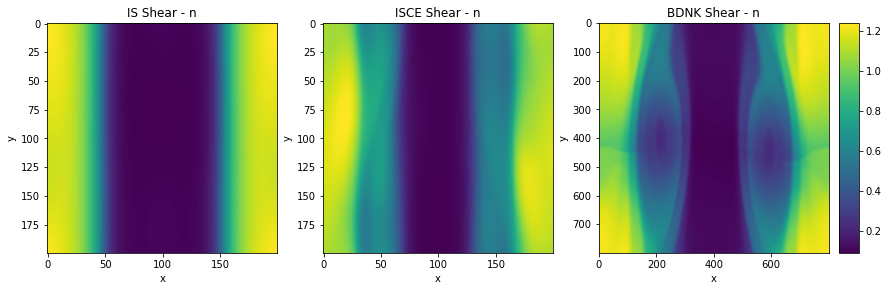

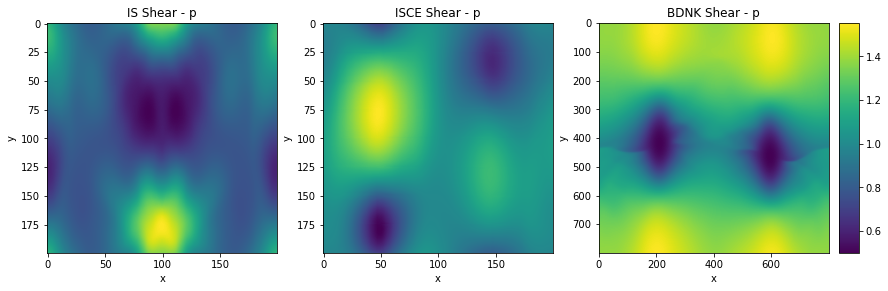

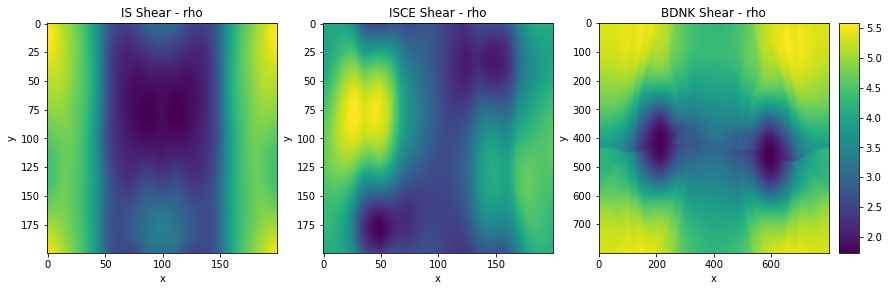

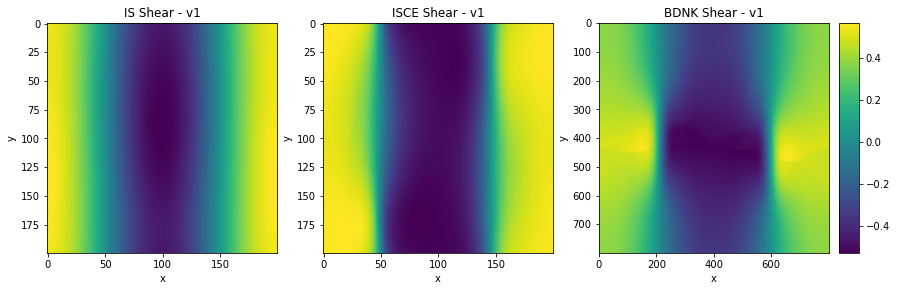

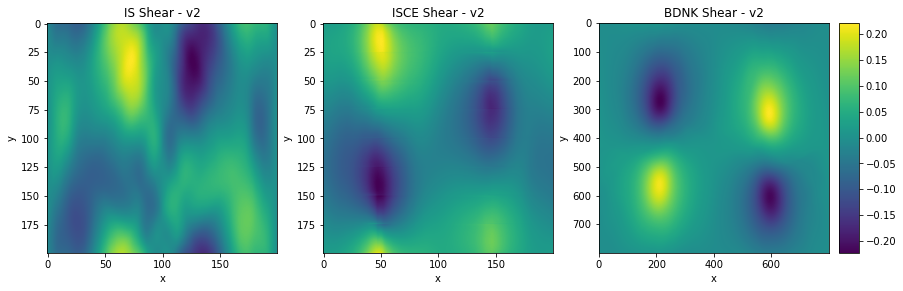

In [42]:
for quant in['n','p','rho','v1','v2']:
    fig, axes = plt.subplots(1,3,figsize=(14, 10))
    for fs, name, sp in zip(fss, names, axes):
        im = sp.imshow(fs[-1]['Primitive/'+quant],label=name)
        sp.set_title(name+' - '+quant)
        sp.set_xlabel('x')
        sp.set_ylabel('y')
#     cbar_ax = fig.add_axes([0.95, 0.1, 0.02, 0.8])
    cax = fig.add_axes([axes[2].get_position().x1+0.01,axes[2].get_position().y0,0.02,axes[2].get_position().height])
#     fig.colorbar(im,fraction=0.1, pad=0.14)#cax=cbar_ax)
    fig.colorbar(im,cax=cax)
    plt.show()
#     plt.savefig("ConfirmationReportPlots/KH/PrimsIDCompare_"+quant+".pdf")

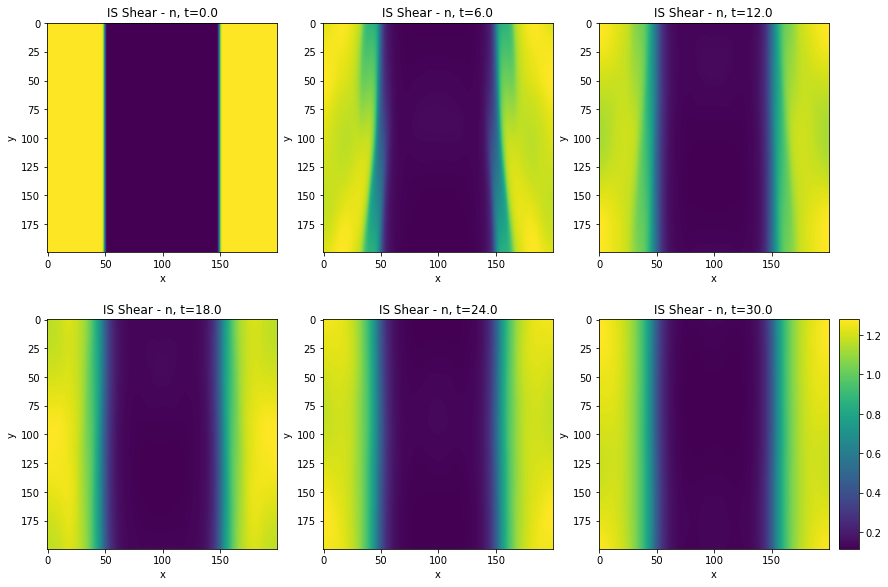

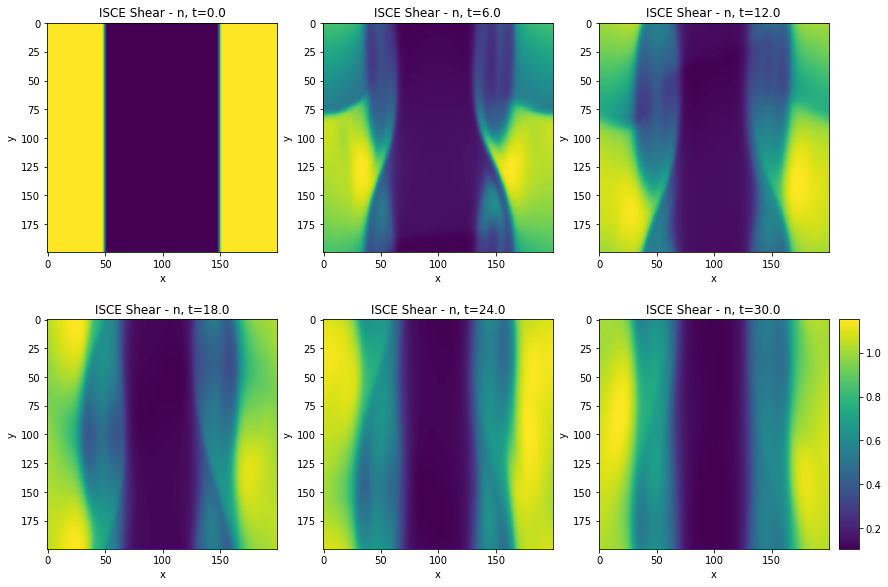

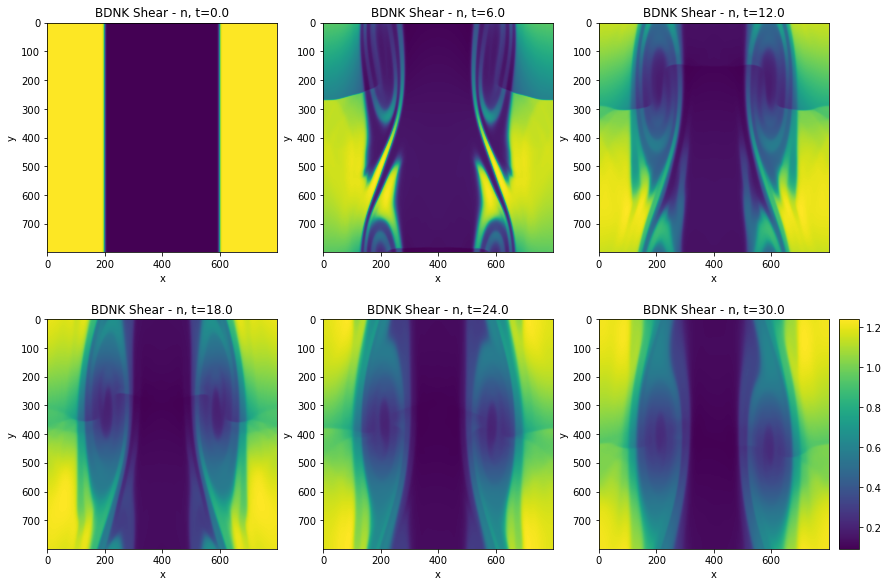

In [47]:
for quant in['n']:
    for fs, name in zip(fss[0::],names):
        fig, axes = plt.subplots(2,3,figsize=(14, 10))
        for f, sp in zip(fs[::2], axes.flatten()):
            im = sp.imshow(f['Primitive/'+quant],label=name)
            sp.set_title(name+' - '+quant+', '+'t='+str(f.attrs['t'][0]))
            sp.set_xlabel('x')
            sp.set_ylabel('y')
    #     cbar_ax = fig.add_axes([0.95, 0.1, 0.02, 0.8])
        cax = fig.add_axes([axes.flatten()[-1].get_position().x1+0.01,axes.flatten()[-1].get_position().y0,0.02,axes.flatten()[-1].get_position().height])
    #     fig.colorbar(im,fraction=0.1, pad=0.14)#cax=cbar_ax)
        fig.colorbar(im,cax=cax)
#         plt.show()
        plt.savefig("ConfirmationReportPlots/KH/nEvolution_"+name+".pdf")